In [13]:
from scipy.stats import pearsonr
import torch


kfac = torch.load("if_analog_scheduler.pt")
for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    name = f"if_analog_scheduler_{t}.pt"
    pca = torch.load(name)
    print("[KFAC (analog) vs KFAC (pca)] pearson:", pearsonr(kfac, pca))


[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=-0.0064257169977792634, pvalue=0.618741096636118)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=-0.0064257169977792634, pvalue=0.618741096636118)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.013204429181025101, pvalue=0.3064770683898601)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.06957773795203742, pvalue=6.856780952728036e-08)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.36371056812379254, pvalue=4.406167381071733e-187)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.5887181540767631, pvalue=0.0)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.6038794428280658, pvalue=0.0)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.6790606092965452, pvalue=0.0)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.9056330870679052, pvalue=0.0)


In [15]:
pearsonr(kfac, pca).statistic

0.9056330870679052

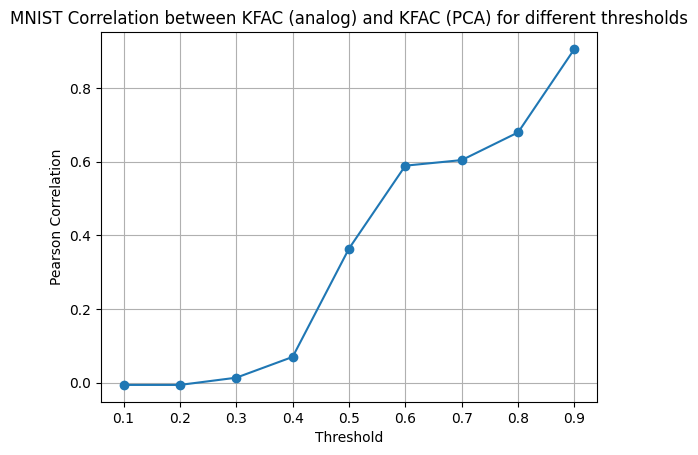

In [14]:
import torch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

kfac = torch.load("if_analog_pca.pt")
correlation_values = []

for t in [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]:
    name = f"if_analog_pca_compress_{t}.pt"
    pca = torch.load(name)
    correlation, _ = pearsonr(kfac, pca)
    correlation_values.append(correlation)

# Plotting
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], correlation_values, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Pearson Correlation')
plt.title('MNIST Correlation between KFAC (analog) and KFAC (PCA) for different thresholds')
plt.grid(True)
plt.show()


In [8]:
kfac_8 = torch.load("if_analog_scheduler.pt")
kfac_8_log = torch.load("if_analog_scheduler_init_from_log_0.8.pt")


In [9]:
pearsonr(kfac_8, kfac_8_log)

PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)

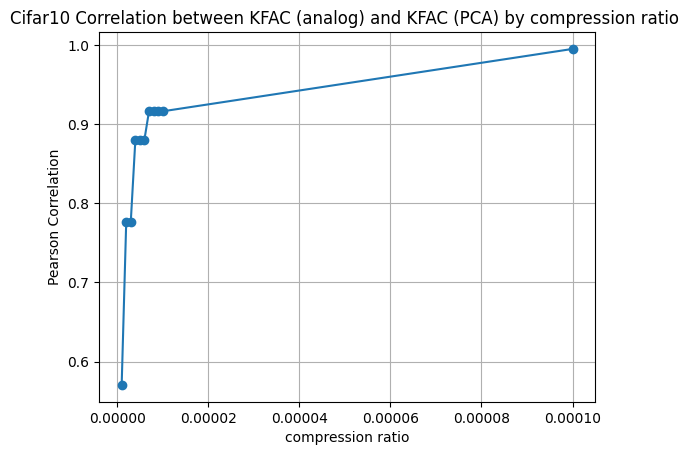

In [5]:
import torch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

kfac = torch.load("if_analog.pt")
correlation_values = []

thres = [0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007, 0.000008, 0.000009, 0.00001, 0.0001]
for t in thres:
    name = f"if_analog_pca_compress_{t}.pt"
    pca = torch.load(name)
    correlation, _ = pearsonr(kfac, pca)
    correlation_values.append(correlation)

# Plotting
plt.plot(thres, correlation_values, marker='o')
plt.xlabel('compression ratio')
plt.ylabel('Pearson Correlation')
plt.title('Cifar10 Correlation between KFAC (analog) and KFAC (PCA) by compression ratio ')
plt.grid(True)
plt.show()


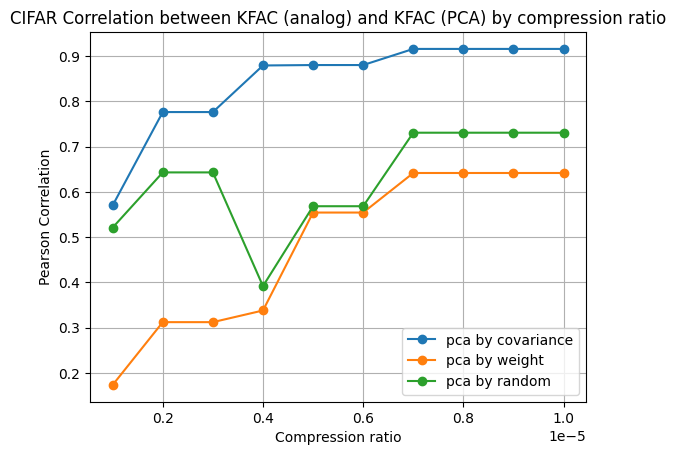

In [5]:
import torch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

kfac = torch.load("results/if_analog.pt")
correlation_values = []
correlation_values_weight = []  # Initialize an empty list for correlations from weight compressions
correlation_values_random = []

thres = [0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007, 0.000008, 0.000009, 0.00001]
for t in thres:
    name = f"results/if_analog_pca_compress_{t}.pt"
    pca = torch.load(name)
    correlation, _ = pearsonr(kfac, pca)
    correlation_values.append(correlation)

    # Load and calculate correlations from weight compressions
    name_weight = f"results/if_analog_pca_by_weight_compression_ratio_by_memory_{t}.pt"
    pca_weight = torch.load(name_weight)
    correlation_weight, _ = pearsonr(kfac, pca_weight)
    correlation_values_weight.append(correlation_weight)

    # Load and calculate correlations from random compressions
    name_random = f"results/if_analog_random_compression_ratio_by_memory_{t}.pt"
    pca_random = torch.load(name_random)
    correlation_random, _ = pearsonr(kfac, pca_random)
    correlation_values_random.append(correlation_random)

# Plotting
plt.plot(thres, correlation_values, marker='o', label='pca by covariance')
plt.plot(thres, correlation_values_weight, marker='o', label='pca by weight')
plt.plot(thres, correlation_values_random, marker='o', label='pca by random')

plt.xlabel('Compression ratio')
plt.ylabel('Pearson Correlation')
plt.title('CIFAR Correlation between KFAC (analog) and KFAC (PCA) by compression ratio')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
kfac

[[-9084.22265625,
  6613.6298828125,
  -112380.8984375,
  -107.3800048828125,
  -1025.5179443359375,
  276.2720642089844,
  -7730.13427734375,
  414.8463439941406,
  8792.158203125,
  31228.095703125,
  2118.114501953125,
  12975.5263671875,
  649.7080688476562,
  -62534.89453125,
  36338.796875,
  6209.3388671875,
  2471.0009765625,
  156774.625,
  -188884.578125,
  -95776.1953125,
  -23734.728515625,
  43503.90625,
  -427.7539978027344,
  -7300.009765625,
  -16768.412109375,
  -166304.25,
  18348.3828125,
  -32424.771484375,
  -58094.62890625,
  -5749.7646484375,
  2993.2509765625,
  -21497.095703125,
  -102.29459381103516,
  430747.375,
  148609.09375,
  9815.94921875,
  159748.34375,
  273206.4375,
  165029.828125,
  176743.671875,
  -24338.564453125,
  -29542.580078125,
  3739.71044921875,
  16.317668914794922,
  -10678.12890625,
  -1697.8487548828125,
  -5117.52197265625,
  -39668.11328125,
  -43529.52734375,
  -4811.03369140625,
  85373.28125,
  -41393.8671875,
  108018.6328125,